## Centrale MP 2023: visualisation du mode propre (3,2,3) dans une cavité micro-ondes 

Dans le problème de physique du concours centrale MP 2023 il était demandé au candidat d'analyser des figures obtenues en plaçant dans une cavité microonde une feuille imbibée d'hexahydrate de chlorure dont la couleur passe de rose à bleu foncé dans les zones les plus chaudes.

Visuellement le mode semble être le (3,2,3). Un calcul de fréquence permet d'ailleurs de le vérifier puisqu'on retrouve les 2,45 GHz attendus.

Un problème se pose lorsqu'on nous demande d'analyser l'aspect de la figure 6b:

On observe bien dans les plans $y=0$ et $y=b$ trois ventres de vibrations (pour $E_y$) aux positions $z=d/6$, $z=d/2$ et $z=5d/6$.

On s'attend à deux ventres de vibrations (pour $E_z$) sur les parois $z=0$ et $z=d$ pour des positions $y=b/4$ et $y=3b/4$. Or on ne les voit pas. Une conclusion possible est de prendre $E_3=0$.

Un raisonnement comparable avec la figure 6c impliquerait $E_1=0$.

Or div$\vec{E}=0$ implique $k_x E_1 + k_y E_2 +k_z E_3 =0$.

On aurait donc $E_2=0$... et un champ nul, ce qui n'est pas le cas du champ observé!

Le problème semble plutôt lié à la sensibilité de la méthode utilisée qui ne permet de détecter que les maxima principaux de vibrations.

### Le but de cette feuille de calcul est de vérifier la présence de maxima secondaires non visibles sur les clichés fournis dans l'énoncé.



In [1]:
%display latex

On cherche le champ électrique à l'intérieur de la cavité sous la forme
$$E_x(x,y,z,t)=E_1 \cos(k_x x)\,\sin(k_y y)\,\sin(k_z z)\,\cos(\omega t)$$
$$E_y(x,y,z,t)=E_2 \sin(k_x x)\,\cos(k_y y)\,\sin(k_z z)\,\cos(\omega t)$$
$$E_z(x,y,z,t)=E_3 \sin(k_x x)\,\sin(k_y y)\,\cos(k_z z) \,\cos(\omega t)$$

On entre les dimensions $a$, $b$ et $d$ repectivement en $x$, $y$ et $z$ de la cavité:

In [2]:
a=36
b=24
d=53/2 # plutôt que 26.5 pour éviter les arrondis dans les calculs dans les fonctions trigo

Les conditions aux limites imposant l'annulation de la composante tangentielle de $\vec{E}$ 
sur les parois entraînent la quantification des valeurs de $k_x$, $k_y$ et $k_z$.

$$ k_x = m \dfrac{\pi}{a} \quad m \in \mathbb{N}$$

$$ k_y = n \dfrac{\pi}{b} \quad n \in \mathbb{N}$$

$$ k_z = l \dfrac{\pi}{d} \quad l \in \mathbb{N}$$

On s'intéresse ici au mode $(m,n,l)=(3,2,3)$

La condition dans le vide ${\rm div}\vec{E}=0$ impose:

$$ k_x E_1 + k_y E_2 +k_z E_3 =0$$

d'où, pour le mode  $(3,2,3)$ considéré:

$$ \frac{3}{a} E_1 + \frac{2}{b} E_2 + \frac{3}{d}E_3 =0$$

Si on choisit $E_1=E_3=1$, on aura $E_2=-\frac{3b}{2}\left(\frac{1}{a}+\frac{1}{d}\right)$

In [3]:
E1=1
E3=1
E2=-3*b*(1/a+1/d)/2

On se place dans l'espace euclidien ℝ3:

In [4]:
R3.<x,y,z> = EuclideanSpace()

In [5]:
E = R3.vector_field(E1*cos(3*pi*x/a)*sin(2*pi*y/b)*sin(3*pi*z/d),
                    E2*sin(3*pi*x/a)*cos(2*pi*y/b)*sin(3*pi*z/d),
                    E3*sin(3*pi*x/a)*sin(2*pi*y/b)*cos(3*pi*z/d),
                    name='E')

## Calcul du carré scalaire

In [6]:
E_car = E.dot(E) #le champ étant défini à une constante multiplicative près on ne met pas le 
# facteur 1/2 provenant de la moyenne du cos^2(omega * t)
print(E_car)

Scalar field E.E on the Euclidean space E^3


In [7]:
EE = E_car.expr()  # expression symbolique représentant E^2
EE

cos(6/53*pi*z)^2*sin(1/12*pi*x)^2*sin(1/12*pi*y)^2 + 1/2809*(15625*cos(1/12*pi*y)^2*sin(1/12*pi*x)^2 + 2809*cos(1/12*pi*x)^2*sin(1/12*pi*y)^2)*sin(6/53*pi*z)^2

### Dessin de la surface de niveau $E^2=1$

In [8]:
implicit_plot3d(EE == 1, (x, 0, a), (y, 0, b), (z, 0, d),
                aspect_ratio=1)

Graphics3d Object

Quand on fait tourner cette figure on voit qu'elle correspond aux observations fournies.

## $E^2$ dans le plan $x=\frac{a}{2}$

Dans ce plan le champ $\vec{E}$ a pour composantes:
$$E_x(y,z,t)=0 $$
$$E_y(y,z,t)=- E_2 \cos(\frac{2\pi}{b} y)\,\sin(\frac{3\pi}{d} z)\,\cos(\omega t)$$
$$E_z(y,z,t)=- E_3 \sin(\frac{2\pi}{b} y)\,\cos(\frac{3\pi}{d} z) \,\cos(\omega t)$$

Ainsi sur les plans 

-  $y=0$ et $y=b$:  $\vec{E}=−E_2 \sin(\frac{3\pi}{d} z)\,\cos(\omega t) \vec{u}_y$ # maxima principaux

-  $z=O$ et $z=d$:  $\vec{E}=−E_3 \sin(\frac{2\pi}{b} y)\,\cos(\omega t) \vec{u}_z$. # maxima secondaires

In [9]:
EEx = EE.subs({x: a/2})
EEx

cos(6/53*pi*z)^2*sin(1/12*pi*y)^2 + 15625/2809*cos(1/12*pi*y)^2*sin(6/53*pi*z)^2

In [10]:
plot3d(EEx, (y, 0, b), (z, 0, d), axes_labels=('y', 'z', 'E^2'))

Graphics3d Object

On aperçoit bien les maxima secondaires sur les parois $z=0$ et $z=d$, probablement trop faibles pour être détectés
avec la méthode employée.

## Figure 6a

In [11]:
EEy = EE.subs({y: b/2})
EEy

15625/2809*sin(1/12*pi*x)^2*sin(6/53*pi*z)^2

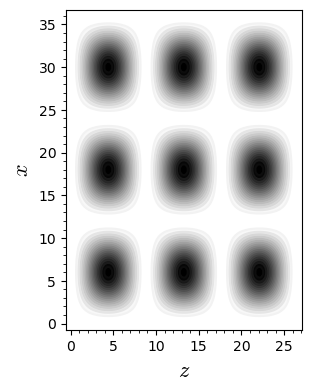

In [12]:
contour_plot(-EEy, (z, 0, d), (x, 0, a), contours=20,
             axes_labels=('$z$', '$x$'))

Cette figure était de loin la plus facile à analyser des trois car elle est conforme à l'expression du champ obtenu et qui s'annule sur toutes les parois latérales.

##  Figure 6b

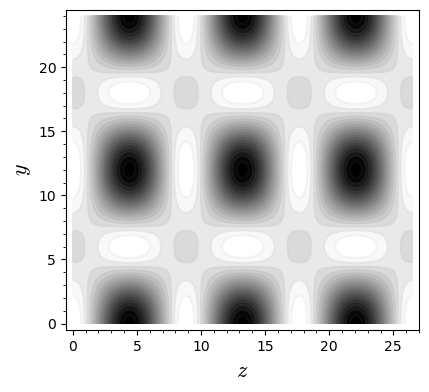

In [13]:
contour_plot(-EEx, (z, 0, d), (y, 0, b), contours=20,
             axes_labels=('$z$', '$y$'))

On observe les maxima secondaires à des positions intermédiaires (sur les lignes $y=b/4$ et $y=3b/4$). Ils sont donc bien présents sur les parois $z=0$ et $z=d$. Ces maxima secondaires sont en dessous du seuil de détection, car on ne les observe pas sur le papier imbibé d'hexahydrate de chlorure.

##  Figure 6c

In [14]:
EEz = EE.subs({z: d/2})
EEz

15625/2809*cos(1/12*pi*y)^2*sin(1/12*pi*x)^2 + cos(1/12*pi*x)^2*sin(1/12*pi*y)^2

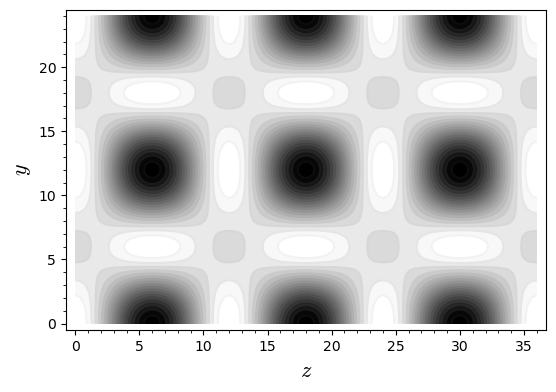

In [15]:
contour_plot(-EEz, (x, 0, a), (y, 0, b), contours=20,
             axes_labels=('$z$', '$y$'))

Même remarque pour la figure 6b.